<a href="https://www.kaggle.com/code/mohamedsobhyelfar/legal-text-classification-report?scriptVersionId=249807761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
 

import numpy as np  
import pandas as pd  
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/legal-text-classification-dataset/legal_text_classification.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/legal-text-classification-dataset/legal_text_classification.csv')
df.head()


,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/legal-text-classification-dataset/legal_text_classification.csv')

print("أول خمس قضايا في البيانات:")
display(df.head())

print("عدد القضايا:", df.shape[0])

print("\nتوزيع نتائج القضايا:")
print(df['case_outcome'].value_counts())

print("\nأطول نص قضية (عدد الحروف):", df['case_text'].str.len().max())
print("أقصر نص قضية (عدد الحروف):", df['case_text'].str.len().min())

print("\nعينة عشوائية من القضايا:")
display(df.sample(3))


أول خمس قضايا في البيانات:


,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


عدد القضايا: 24985

توزيع نتائج القضايا:
case_outcome
cited            12219
referred to       4384
applied           2448
followed          2256
considered        1712
discussed         1024
distinguished      608
related            113
affirmed           113
approved           108
Name: count, dtype: int64

أطول نص قضية (عدد الحروف): 133561.0
أقصر نص قضية (عدد الحروف): 95.0

عينة عشوائية من القضايا:


,case_id,case_outcome,case_title,case_text
9335,Case9429,referred to,Commonwealth of Australia v Borg [1991] FCA 71...,Counsel for Mr Lang submitted that although th...
18731,Case18900,applied,O'Reilly v Commissioners of the State Bank of ...,"Further, the general law of agency supports th..."
2395,Case2418,cited,"Randhawa v Minister for Immigration, Local Gov...","On 28 December 2007, the appellant filed a not..."


In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_case_text'] = df['case_text'].astype(str).apply(clean_text)
df[['case_text', 'clean_case_text']].head()


,case_text,clean_case_text
0,Ordinarily that discretion will be exercised s...,ordinarily that discretion will be exercised s...
1,The general principles governing the exercise ...,the general principles governing the exercise ...
2,Ordinarily that discretion will be exercised s...,ordinarily that discretion will be exercised s...
3,The general principles governing the exercise ...,the general principles governing the exercise ...
4,The preceding general principles inform the ex...,the preceding general principles inform the ex...


In [5]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv('/kaggle/input/legal-text-classification-dataset/legal_text_classification.csv')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_case_text'] = df['case_text'].apply(clean_text)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_case_text'])

y = df['case_outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


               precision    recall  f1-score   support

     affirmed       0.60      0.09      0.16        32
      applied       0.39      0.08      0.13       515
     approved       0.00      0.00      0.00        19
        cited       0.55      0.92      0.69      2457
   considered       0.32      0.06      0.10       324
    discussed       0.38      0.06      0.11       205
distinguished       0.70      0.06      0.11       122
     followed       0.44      0.10      0.16       436
  referred to       0.50      0.32      0.39       859
      related       1.00      0.04      0.07        28

     accuracy                           0.53      4997
    macro avg       0.49      0.17      0.19      4997
 weighted avg       0.50      0.53      0.45      4997



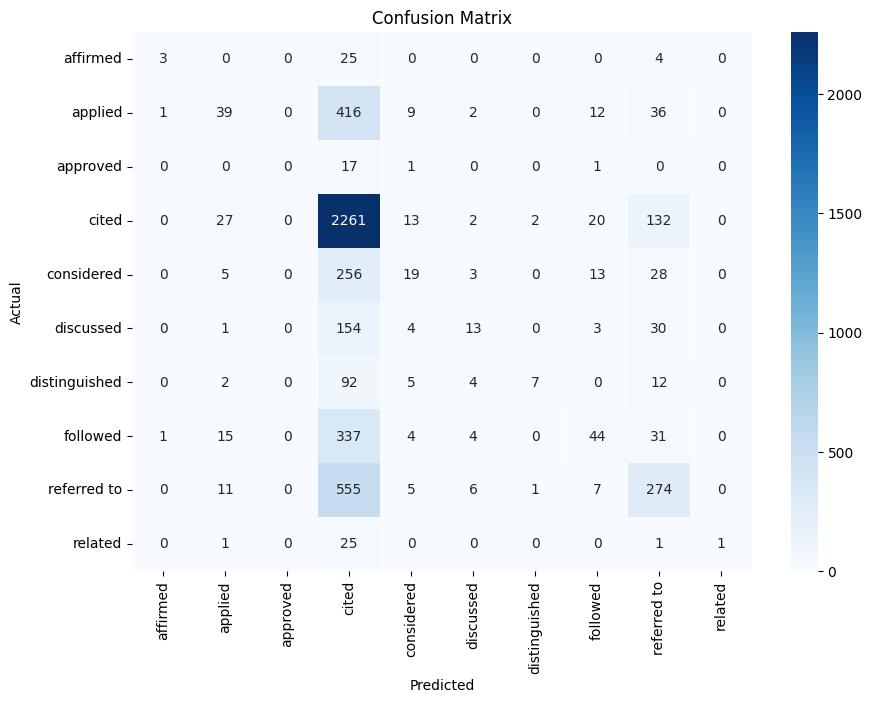

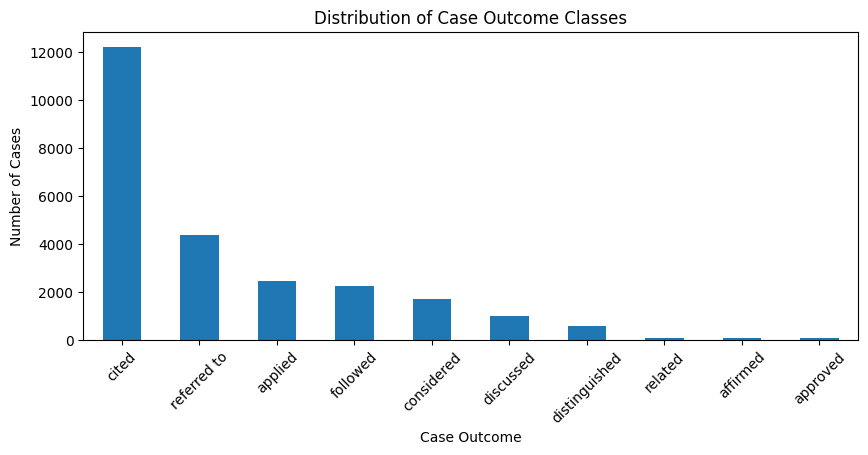

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(10,4))
df['case_outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Case Outcome Classes')
plt.xlabel('Case Outcome')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()
